In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

* 分布
    * distplot 概率分布图
    * kdeplot 概率密度图
    * jointplot 联合密度图
    * pairplot 多变量图
* 分类
    * boxplots 箱线图
    * violinplots 提琴图
    * barplot 柱形图
    * factorplot 因子图
* 线性
    * implot 回归图
    * heatmap

In [28]:
columns = ['user_Id','order_dt','order_product','order_amount']
df = pd.read_table('f:/test/CDNOW_master.txt',sep='\s+',names = columns)
df.head()

,user_Id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


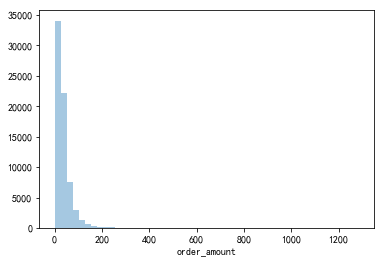

In [29]:
sns.distplot(df.order_amount,kde=False)

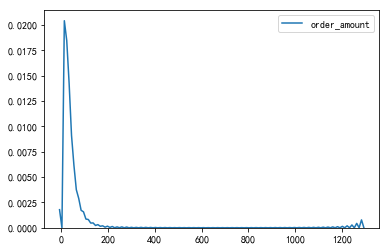

In [30]:
sns.kdeplot(df.order_amount)

In [31]:
grouped_user = df.groupby('user_Id').sum()
grouped_user.head()

,order_dt,order_product,order_amount
user_Id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


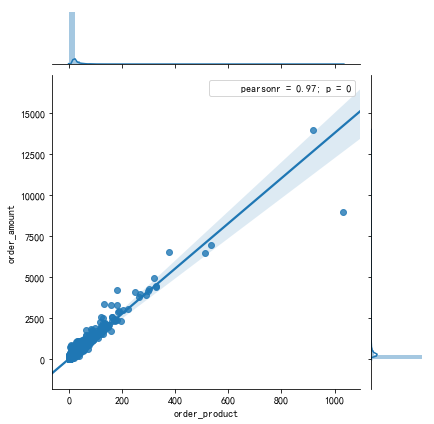

In [32]:
sns.jointplot(grouped_user.order_product,grouped_user.order_amount,kind='reg') #jointplot 联合密度图,reg 回归分析

In [33]:
df['order_dt'] = pd.to_datetime(df['order_dt'])
df['order_dt'] = df.order_dt.values.astype('datetime64[D]')
df.head()

,user_Id,order_dt,order_product,order_amount
0,1,1970-01-01,1,11.77
1,2,1970-01-01,1,12.00
2,2,1970-01-01,5,77.00
3,3,1970-01-01,2,20.76
4,3,1970-01-01,2,20.76


In [34]:
rfm = df.pivot_table(index = 'user_Id',
              values = ['order_product','order_amount','order_dt'],
              aggfunc = {'order_dt':'max', #最近购买
                         'order_product':'sum',# 购买总量
                        'order_amount':'sum'})# 消费总金额
rfm.rename(columns={'order_product':'F','order_amount':'M'},inplace = True)
rfm['R'] = -(rfm.order_dt- np.datetime64('today'))/np.timedelta64(1,'D')
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23570 entries, 1 to 23570
Data columns (total 4 columns):
M           23570 non-null float64
order_dt    23570 non-null datetime64[ns]
F           23570 non-null int64
R           23570 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 920.7 KB


d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
d:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


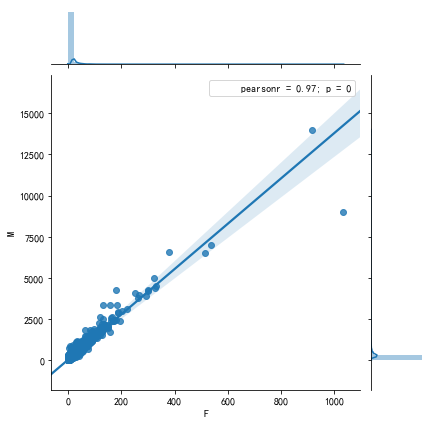

In [35]:
sns.jointplot(rfm.F,rfm.M,kind='reg')

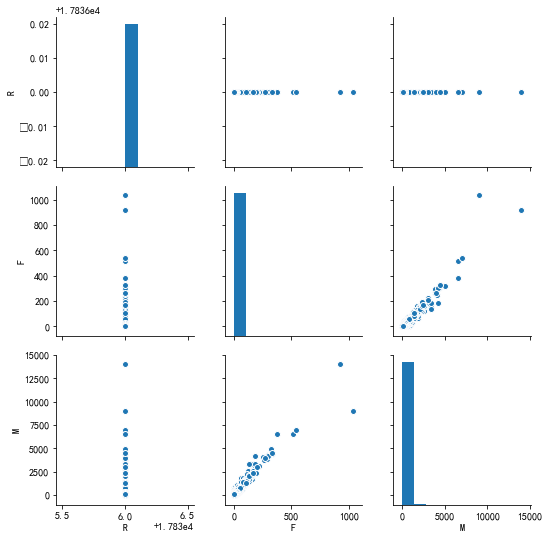

In [36]:
sns.pairplot(rfm[['R','F','M']])

* pairplot 多变量图

In [37]:
cy = pd.read_csv('f:/test/cy.csv',encoding='gbk')
cy.head()

,城市,类型,店名,点评,人均,口味,环境,服务
0,北京,私房菜,梧桐宇私房菜,45.0,80.0,7.3,7.3,7.1
1,北京,私房菜,小东北私房菜,1.0,35.0,6.9,6.9,6.9
2,北京,私房菜,辣家私房菜,1.0,NaN,6.9,6.9,6.9
3,北京,私房菜,鸿福天原,NaN,NaN,NaN,NaN,NaN
4,北京,私房菜,虾而美(北京)餐饮管理有限公司,NaN,NaN,NaN,NaN,NaN


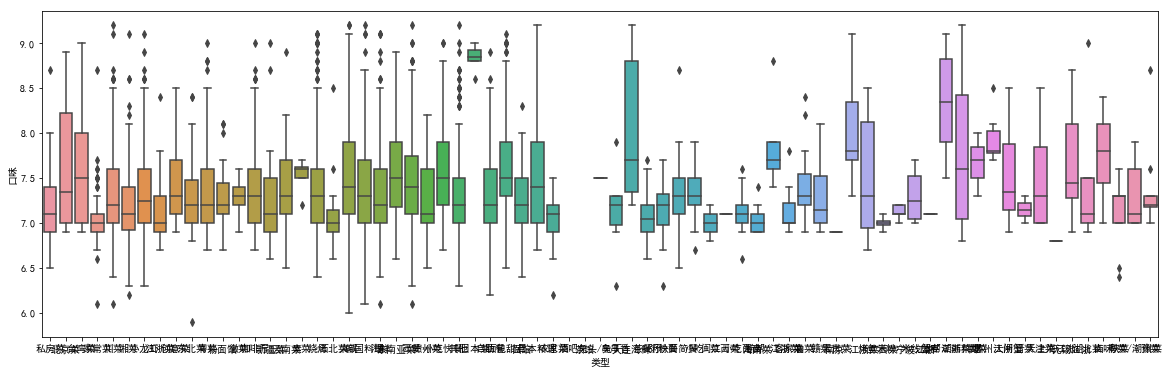

In [38]:
plt.figure(figsize=(20,6))
sns.boxplot(x='类型',y='口味',data=cy)

In [39]:
cy2 = cy.query("(城市 == '上海')|(城市 == '北京')")
cy2.head()

,城市,类型,店名,点评,人均,口味,环境,服务
0,北京,私房菜,梧桐宇私房菜,45.0,80.0,7.3,7.3,7.1
1,北京,私房菜,小东北私房菜,1.0,35.0,6.9,6.9,6.9
2,北京,私房菜,辣家私房菜,1.0,NaN,6.9,6.9,6.9
3,北京,私房菜,鸿福天原,NaN,NaN,NaN,NaN,NaN
4,北京,私房菜,虾而美(北京)餐饮管理有限公司,NaN,NaN,NaN,NaN,NaN


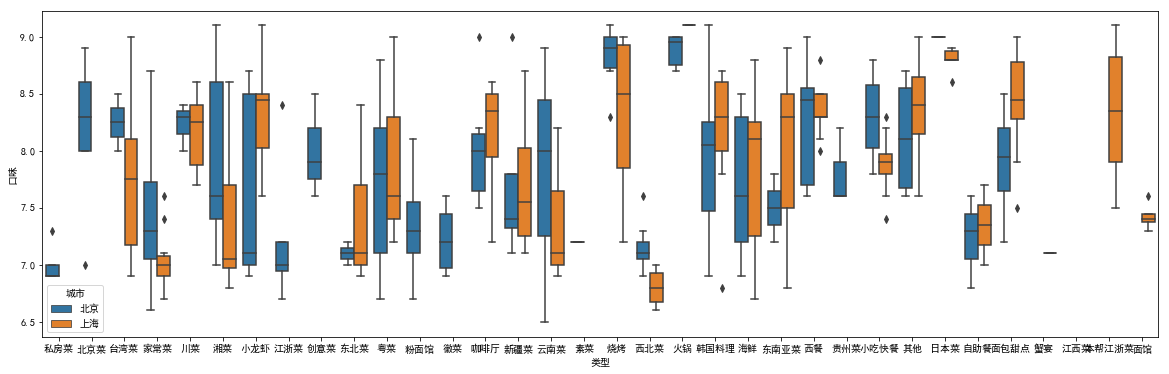

In [40]:
plt.figure(figsize=(20,6))
sns.boxplot(x='类型',y='口味',data=cy2,hue='城市')

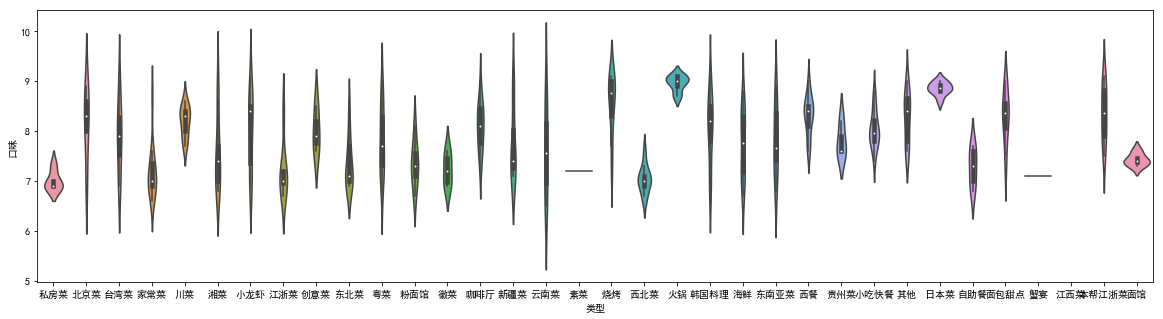

In [41]:
plt.figure(figsize=(20,5))
sns.violinplot(x='类型',y='口味',data=cy2)

violinplots 提琴图

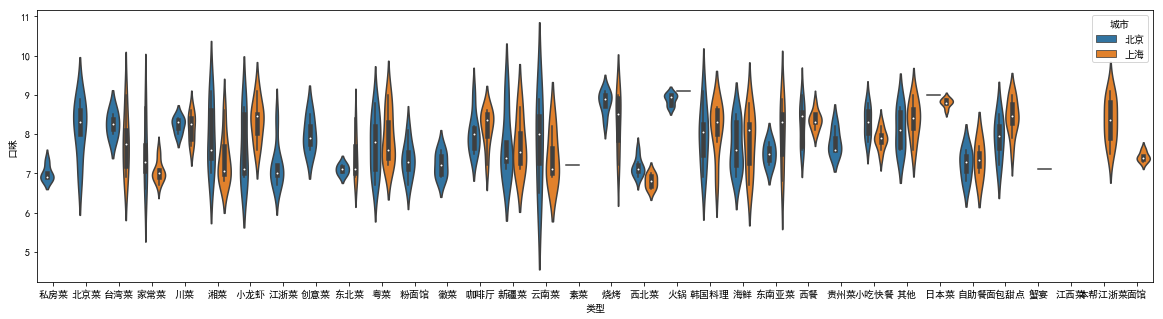

In [42]:
plt.figure(figsize=(20,5))
sns.violinplot(x='类型',y='口味',data=cy2,hue='城市')

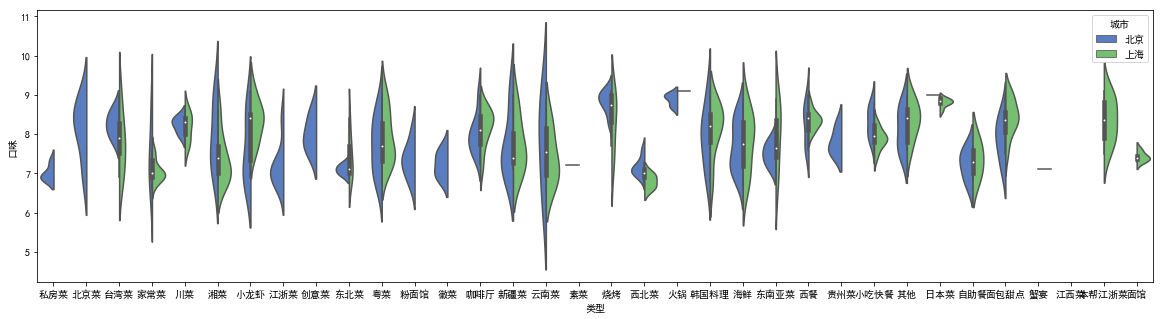

In [43]:
plt.figure(figsize=(20,5))
sns.violinplot(x='类型',y='口味',data=cy2,hue='城市',palette='muted',split=True)# split 拼接

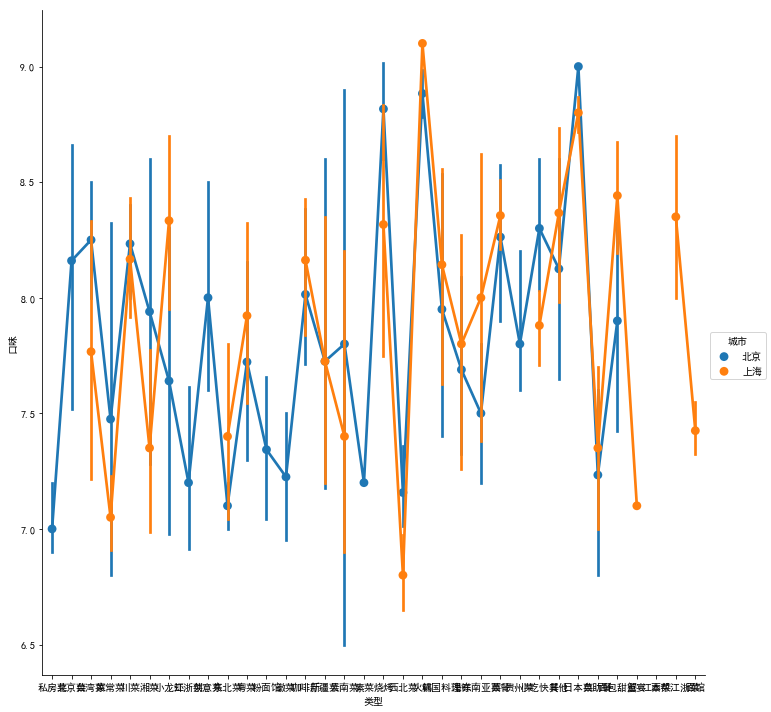

In [44]:
sns.factorplot(x='类型',y='口味',hue='城市',data=cy2,size = 10)# factorplot 因子图

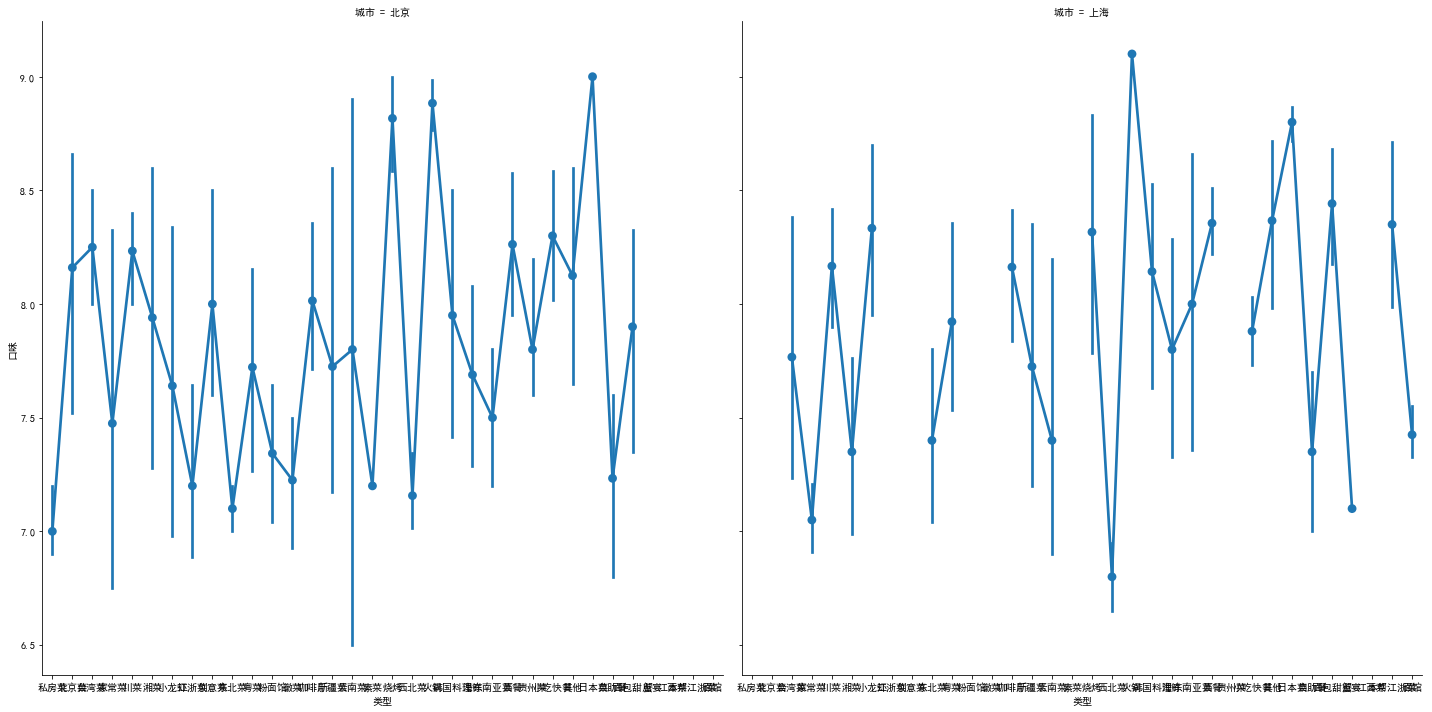

In [45]:
sns.factorplot(x='类型',y='口味',col='城市',data=cy2,size = 10,aspect=1)

# 线性

In [46]:
cy.tail()

,城市,类型,店名,点评,人均,口味,环境,服务
5858,珠海,小吃快餐,柠溪豆腐小吃摊,4.0,NaN,7.2,7.1,6.9
5859,珠海,小吃快餐,泰伽麻辣香锅,7.0,NaN,6.8,6.8,6.8
5860,珠海,小吃快餐,澳门大包(北山店),2.0,NaN,7.1,7.1,7.1
5861,珠海,小吃快餐,花溪牛肉粉(柠溪店),12.0,16.0,7.0,7.0,7.0
5862,珠海,东北菜,高粱红饺子馆,2.0,NaN,7.5,7.5,7.5


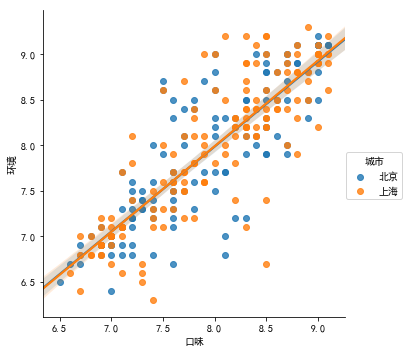

In [47]:
sns.lmplot(x='口味',y='环境',data=cy2,hue='城市')# implot 回归图

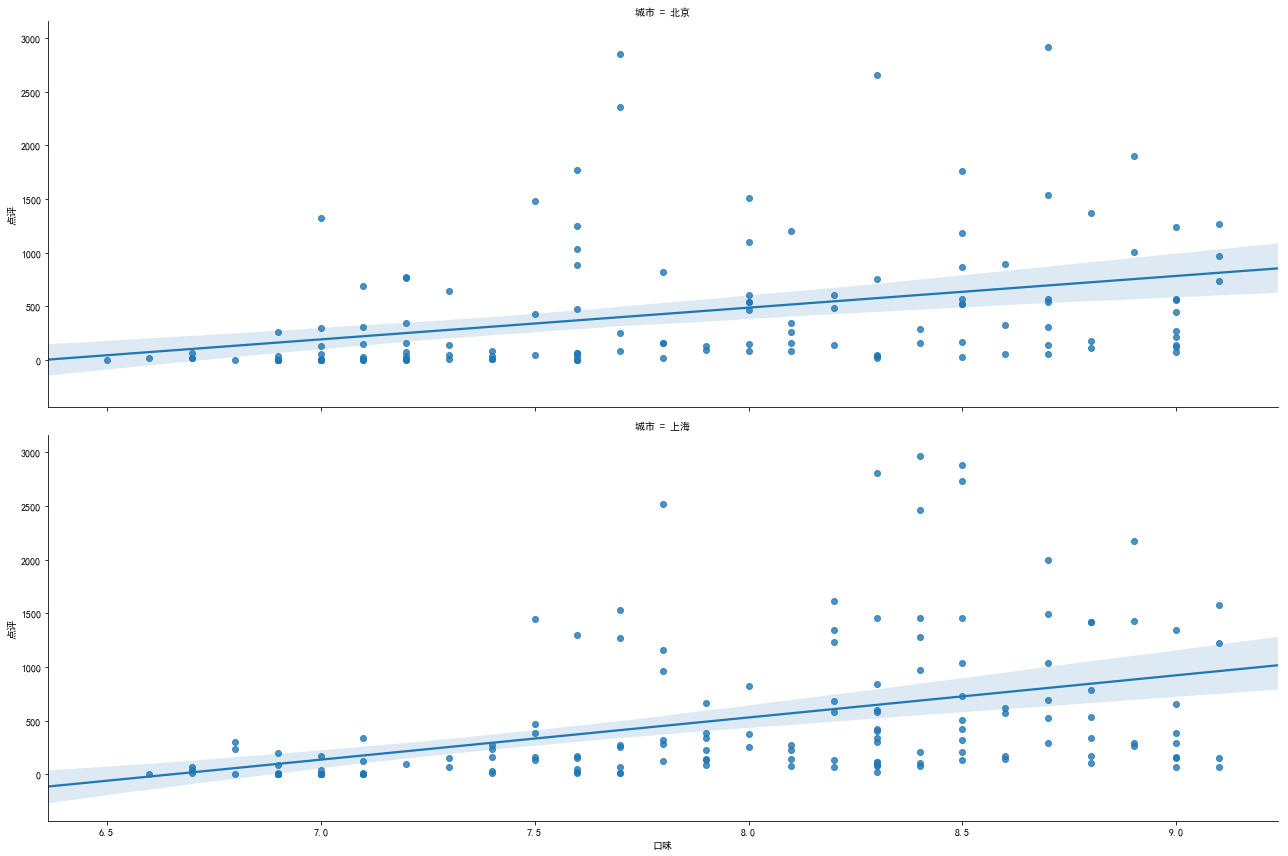

In [48]:
sns.lmplot(x='口味',y='点评',data=cy2.query('点评<3000'),row='城市',size=6,aspect= 3) #  无规律    

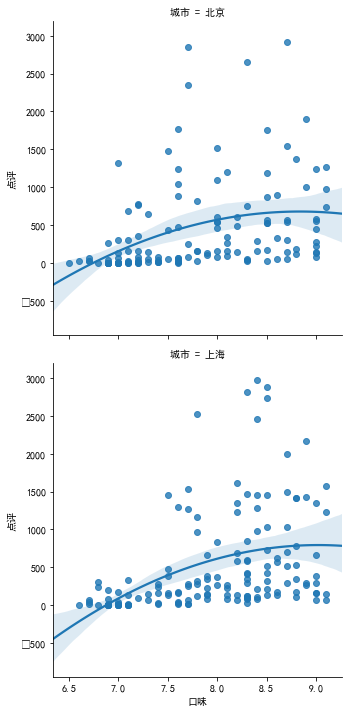

In [49]:
sns.lmplot(x='口味',y='点评',data=cy2.query('点评<3000'),row='城市',order=2)

heatmap 热力图

In [50]:
cypt = cy.pivot_table(index='城市',
              columns='类型',
               values='口味'
              )

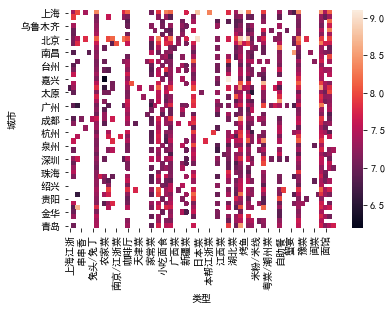

In [51]:
sns.heatmap(cypt)

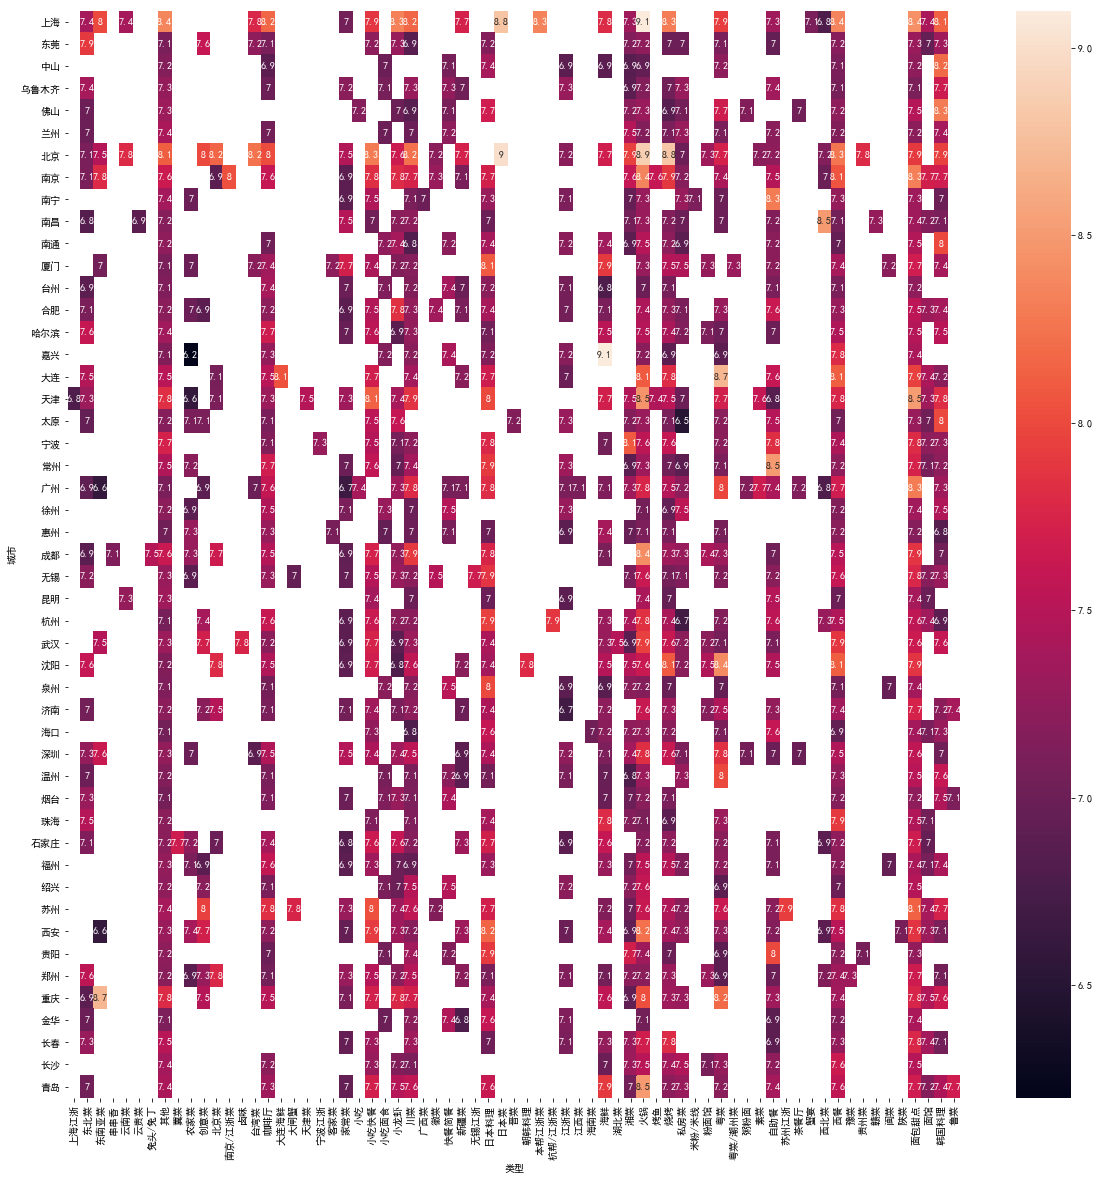

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(cypt,annot=True)